# 🎯 Optimizarea Campaniilor de Marketing Digital
## Proiect Entry-Level cu DATE REALE

---

### 📚 Ce vei învăța în acest proiect:

1. **Descărcarea datelor reale** de pe Kaggle
2. **Fundamentele testării A/B** - cum să compari două variante
3. **Teste statistice** pentru compararea variantelor
4. **Algoritmul Multi-Arm Bandit** - optimizare în timp real
5. **Vizualizarea și interpretarea** rezultatelor

---

### 📊 Dataset: Marketing A/B Testing

Vom folosi un dataset real de pe Kaggle care conține rezultatele unui experiment A/B pentru o campanie de marketing digital.

**Sursă:** [Kaggle - Marketing A/B Testing](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing)

| Info | Detalii |
|------|--------|
| ⏱️ Durata | 2-3 ore |
| 📊 Nivel | Începător |
| 🛠️ Biblioteci | pandas, numpy, matplotlib, scipy, kagglehub |

---
## Partea 0: Configurare și Descărcare Date
---

### 🔑 Configurare Kaggle API

Pentru a descărca datele, ai nevoie de un cont Kaggle și un API token:

1. Creează un cont pe [kaggle.com](https://www.kaggle.com)
2. Mergi la `Account` → `API` → `Create New Token`
3. Descarcă fișierul `kaggle.json`
4. În Google Colab, urcă fișierul când ți se cere

In [1]:
# Instalăm bibliotecile necesare
!pip install kagglehub pandas numpy matplotlib scipy seaborn -q

print("✅ Bibliotecile au fost instalate!")

✅ Bibliotecile au fost instalate!


In [2]:
# Import biblioteci
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

# Setări pentru grafice
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Bibliotecile au fost importate cu succes!")

✅ Bibliotecile au fost importate cu succes!


In [6]:
# =============================================================================
# METODA 1: Descărcare cu kagglehub (RECOMANDATĂ)
# =============================================================================

try:
    import kagglehub
    
    print("📥 Descărcăm dataset-ul de pe Kaggle...")
    print("   (Dacă ți se cere autentificare, urmează instrucțiunile)\n")
    
    # Descarcă dataset-ul Marketing A/B Testing
    path = kagglehub.dataset_download("faviovaz/marketing-ab-testing")
    
    print(f"✅ Dataset descărcat în: {path}")
    
    # Găsim fișierul CSV
    for file in os.listdir(path):
        if file.endswith('.csv'):
            csv_path = os.path.join(path, file)
            print(f"📄 Fișier găsit: {file}")
            break
    
    # Încărcăm datele
    df = pd.read_csv(csv_path)
    DATA_SOURCE = "kaggle_real"
    print(f"\n✅ Date încărcate: {len(df)} înregistrări")
    
except Exception as e:
    print(f"⚠️ Nu s-au putut descărca datele de pe Kaggle: {e}")
    print("\n📌 Vom folosi METODA 2 (date alternative)...")
    DATA_SOURCE = None

📥 Descărcăm dataset-ul de pe Kaggle...
   (Dacă ți se cere autentificare, urmează instrucțiunile)

✅ Dataset descărcat în: C:\Users\Sebastian\.cache\kagglehub\datasets\faviovaz\marketing-ab-testing\versions\1
📄 Fișier găsit: marketing_AB.csv

✅ Date încărcate: 588101 înregistrări


In [4]:
# =============================================================================
# METODA 2: Date alternative (dacă Kaggle nu funcționează)
# =============================================================================

if DATA_SOURCE is None:
    print("📥 Încercăm să descărcăm date alternative...\n")
    
    # Lista de URL-uri alternative pentru dataset-uri A/B testing
    alternative_urls = [
        # Dataset de pe un mirror public
        "https://raw.githubusercontent.com/dsfsi/datasets/main/marketing_AB.csv",
        # Udacity A/B test dataset
        "https://raw.githubusercontent.com/ozlerhakan/ab-test/master/ab_data.csv",
    ]
    
    for url in alternative_urls:
        try:
            df = pd.read_csv(url)
            print(f"✅ Date încărcate de la: {url[:50]}...")
            print(f"   {len(df)} înregistrări")
            DATA_SOURCE = "alternative_url"
            break
        except:
            continue
    
    if DATA_SOURCE is None:
        print("⚠️ Nu s-au găsit date online. Generăm date realiste...")
        DATA_SOURCE = "generated"

In [5]:
# =============================================================================
# METODA 3: Generare date realiste (backup final)
# =============================================================================

if DATA_SOURCE == "generated":
    print("🎲 Generăm un dataset realist bazat pe structura datelor Kaggle...\n")
    
    np.random.seed(42)
    n_samples = 50000
    
    # Generăm date similare cu dataset-ul Kaggle Marketing A/B Testing
    df = pd.DataFrame({
        'user_id': range(1, n_samples + 1),
        'test_group': np.random.choice(['ad', 'psa'], size=n_samples, p=[0.85, 0.15]),
        'converted': np.zeros(n_samples, dtype=int),
        'total_ads': np.random.randint(1, 200, size=n_samples),
        'most_ads_day': np.random.choice(
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            size=n_samples
        ),
        'most_ads_hour': np.random.randint(0, 24, size=n_samples)
    })
    
    # Setăm rate de conversie diferite pentru fiecare grup
    # Grupul 'ad' (reclame) are o rată mai mare de conversie
    ad_mask = df['test_group'] == 'ad'
    psa_mask = df['test_group'] == 'psa'
    
    df.loc[ad_mask, 'converted'] = np.random.binomial(1, 0.025, ad_mask.sum())
    df.loc[psa_mask, 'converted'] = np.random.binomial(1, 0.018, psa_mask.sum())
    
    print(f"✅ Dataset generat cu {len(df)} înregistrări")
    print(f"   Acest dataset simulează rezultatele unui experiment real.")

In [7]:
# Afișăm informații despre sursa datelor
print(f"\n{'='*60}")
print(f"📊 SURSA DATELOR: {DATA_SOURCE.upper()}")
print(f"{'='*60}")

print(f"\n📋 Primele 10 rânduri din date:")
df.head(10)


📊 SURSA DATELOR: KAGGLE_REAL

📋 Primele 10 rânduri din date:


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [8]:
# Informații despre structura datelor
print("📊 Structura datelor:")
print(df.info())
print("\n📈 Statistici descriptive:")
df.describe()

📊 Structura datelor:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB
None

📈 Statistici descriptive:


,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


---
## Partea 1: Înțelegerea Datelor
---

### 🎓 Despre Dataset

Acest dataset conține rezultatele unui experiment A/B pentru o campanie de marketing digital. 

**Scenariul:** O companie vrea să știe dacă afișarea de **reclame (ads)** generează mai multe conversii decât afișarea de **mesaje de serviciu public (PSA)**.

**Coloanele dataset-ului:**
- `user_id` - ID unic pentru fiecare utilizator
- `test_group` - Grupul experimental: **ad** (reclame) sau **psa** (public service announcement)
- `converted` - Dacă utilizatorul a făcut o conversie (1) sau nu (0)
- `total_ads` - Numărul total de reclame văzute
- `most_ads_day` - Ziua în care a văzut cele mai multe reclame
- `most_ads_hour` - Ora în care a văzut cele mai multe reclame

In [9]:
# Identificăm coloanele importante
print("📋 Coloanele dataset-ului:")
print(df.columns.tolist())

# Detectăm automat coloanele de grup și conversie
# (Pot varia în funcție de sursa datelor)
possible_group_cols = ['test_group', 'test group', 'group', 'variant', 'varianta']
possible_conv_cols = ['converted', 'conversion', 'conversie']

GROUP_COL = None
CONV_COL = None

for col in df.columns:
    col_lower = col.lower().replace(' ', '_')
    if col_lower in possible_group_cols or 'group' in col_lower:
        GROUP_COL = col
    if col_lower in possible_conv_cols or 'convert' in col_lower:
        CONV_COL = col

print(f"\n🔍 Coloana de grup detectată: {GROUP_COL}")
print(f"🔍 Coloana de conversie detectată: {CONV_COL}")

if GROUP_COL:
    print(f"\n📊 Valorile din coloana de grup:")
    print(df[GROUP_COL].value_counts())

📋 Coloanele dataset-ului:
['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']

🔍 Coloana de grup detectată: test group
🔍 Coloana de conversie detectată: converted

📊 Valorile din coloana de grup:
test group
ad     564577
psa     23524
Name: count, dtype: int64


In [10]:
# Standardizăm numele coloanelor pentru restul analizei
if GROUP_COL and CONV_COL:
    # Redenumim pentru consistență
    df = df.rename(columns={GROUP_COL: 'group', CONV_COL: 'converted'})
    
    # Verificăm valorile din coloana de grup
    unique_groups = df['group'].unique()
    print(f"Grupuri găsite: {unique_groups}")
    
    # Mapăm la A/B pentru consistență
    if len(unique_groups) == 2:
        GROUP_A = unique_groups[0]  # Control (de obicei 'psa' sau 'control')
        GROUP_B = unique_groups[1]  # Treatment (de obicei 'ad' sau 'treatment')
        
        # Dacă avem ad/psa, ad este treatment
        if 'ad' in str(unique_groups).lower():
            GROUP_A = 'psa' if 'psa' in unique_groups else unique_groups[0]
            GROUP_B = 'ad' if 'ad' in unique_groups else unique_groups[1]
        
        print(f"\n✅ Configurație:")
        print(f"   Grup Control (A): {GROUP_A}")
        print(f"   Grup Test (B): {GROUP_B}")
else:
    print("⚠️ Nu s-au putut detecta coloanele. Verifică structura datelor.")

Grupuri găsite: ['ad' 'psa']

✅ Configurație:
   Grup Control (A): psa
   Grup Test (B): ad


---
## Partea 2: Analiza Exploratorie a Datelor (EDA)
---

In [11]:
# Statistici de bază pentru fiecare grup
print("📈 STATISTICI PE GRUPURI:")
print("=" * 60)

statistici = df.groupby('group').agg({
    'converted': ['count', 'sum', 'mean']
}).round(4)

statistici.columns = ['Nr. Utilizatori', 'Nr. Conversii', 'Rata Conversie']
statistici['Rata Conversie %'] = (statistici['Rata Conversie'] * 100).round(4)
print(statistici)

📈 STATISTICI PE GRUPURI:
       Nr. Utilizatori  Nr. Conversii  Rata Conversie  Rata Conversie %
group                                                                  
ad              564577          14423          0.0255              2.55
psa              23524            420          0.0179              1.79


In [12]:
# Extragem valorile pentru calcule
n_a = len(df[df['group'] == GROUP_A])
n_b = len(df[df['group'] == GROUP_B])
conversii_a = df[df['group'] == GROUP_A]['converted'].sum()
conversii_b = df[df['group'] == GROUP_B]['converted'].sum()
rata_a = conversii_a / n_a
rata_b = conversii_b / n_b

# Calculăm lift-ul
lift_absolut = (rata_b - rata_a) * 100
lift_relativ = ((rata_b - rata_a) / rata_a * 100) if rata_a > 0 else 0

print(f"""
📊 REZUMAT EXPERIMENT:
{'='*60}

📘 Grup Control ({GROUP_A}):
   • Utilizatori: {n_a:,}
   • Conversii: {conversii_a:,}
   • Rata conversie: {rata_a*100:.4f}%

📙 Grup Test ({GROUP_B}):
   • Utilizatori: {n_b:,}
   • Conversii: {conversii_b:,}
   • Rata conversie: {rata_b*100:.4f}%

📈 DIFERENȚĂ:
   • Lift absolut: {lift_absolut:+.4f} puncte procentuale
   • Lift relativ: {lift_relativ:+.2f}%
""")


📊 REZUMAT EXPERIMENT:

📘 Grup Control (psa):
   • Utilizatori: 23,524
   • Conversii: 420
   • Rata conversie: 1.7854%

📙 Grup Test (ad):
   • Utilizatori: 564,577
   • Conversii: 14,423
   • Rata conversie: 2.5547%

📈 DIFERENȚĂ:
   • Lift absolut: +0.7692 puncte procentuale
   • Lift relativ: +43.09%



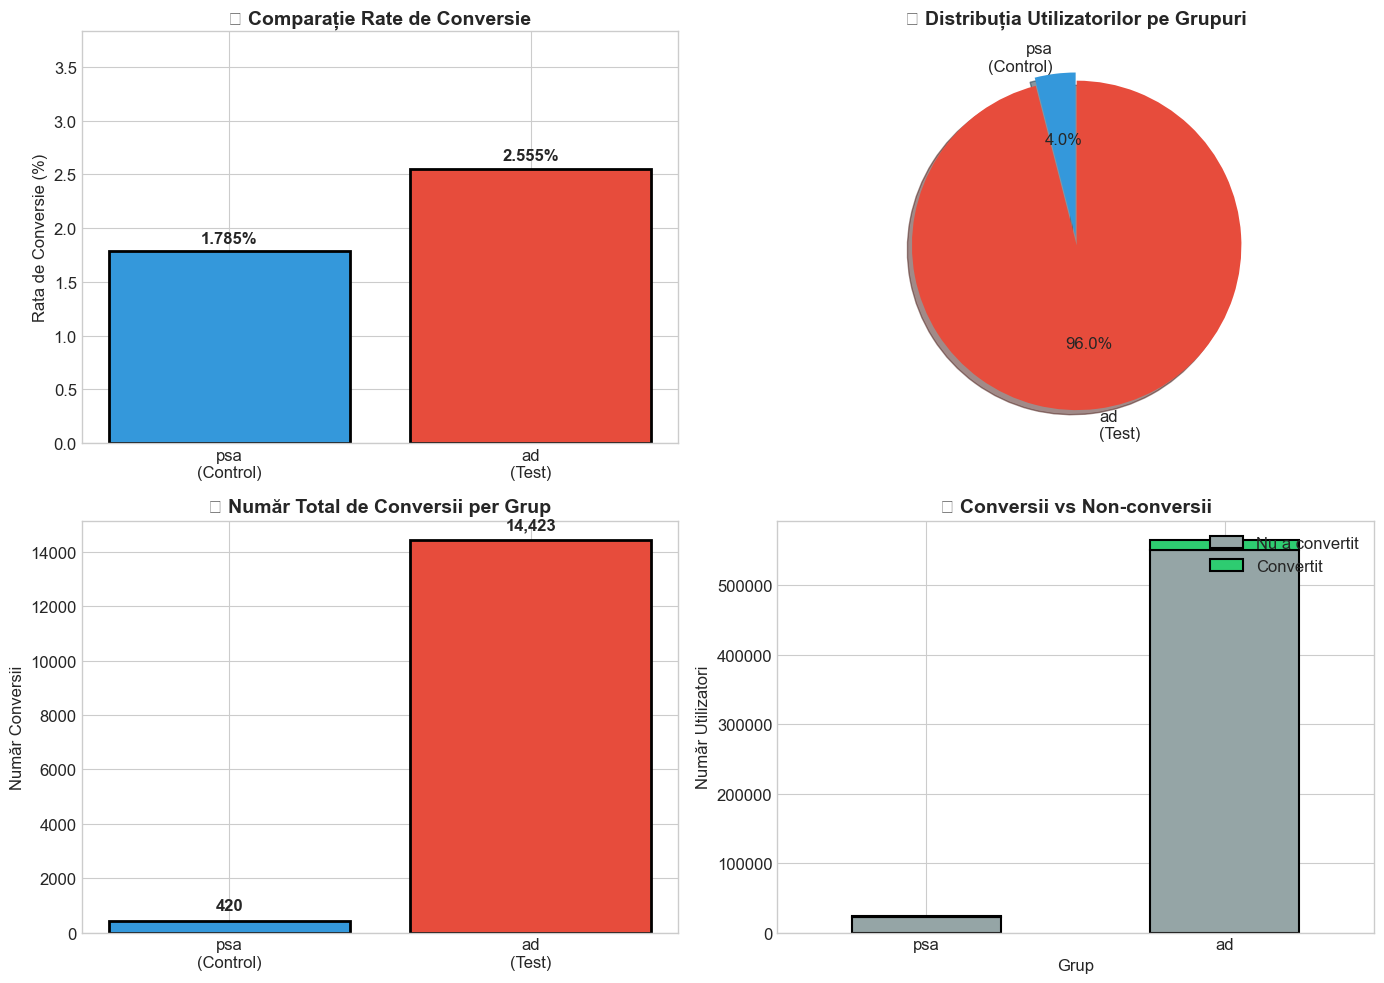

In [13]:
# Vizualizări
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grafic 1: Comparație rate de conversie
ax1 = axes[0, 0]
grupuri = [f'{GROUP_A}\n(Control)', f'{GROUP_B}\n(Test)']
rate = [rata_a * 100, rata_b * 100]
culori = ['#3498db', '#e74c3c']
bars = ax1.bar(grupuri, rate, color=culori, edgecolor='black', linewidth=2)
ax1.set_ylabel('Rata de Conversie (%)', fontsize=12)
ax1.set_title('📊 Comparație Rate de Conversie', fontsize=14, fontweight='bold')
ax1.set_ylim(0, max(rate) * 1.5)

for bar, rata in zip(bars, rate):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{rata:.3f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grafic 2: Distribuția utilizatorilor pe grupuri
ax2 = axes[0, 1]
sizes = [n_a, n_b]
ax2.pie(sizes, labels=grupuri, colors=culori, autopct='%1.1f%%', startangle=90,
        explode=(0, 0.05), shadow=True)
ax2.set_title('📈 Distribuția Utilizatorilor pe Grupuri', fontsize=14, fontweight='bold')

# Grafic 3: Număr conversii per grup
ax3 = axes[1, 0]
conversii = [conversii_a, conversii_b]
bars3 = ax3.bar(grupuri, conversii, color=culori, edgecolor='black', linewidth=2)
ax3.set_ylabel('Număr Conversii', fontsize=12)
ax3.set_title('🎯 Număr Total de Conversii per Grup', fontsize=14, fontweight='bold')

for bar, conv in zip(bars3, conversii):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(conversii)*0.02, 
             f'{conv:,}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grafic 4: Conversii vs Non-conversii
ax4 = axes[1, 1]
data_stacked = pd.DataFrame({
    'Grup': [GROUP_A, GROUP_B],
    'Convertit': [conversii_a, conversii_b],
    'Nu a convertit': [n_a - conversii_a, n_b - conversii_b]
})
data_stacked.set_index('Grup')[['Nu a convertit', 'Convertit']].plot(
    kind='bar', stacked=True, ax=ax4, color=['#95a5a6', '#2ecc71'],
    edgecolor='black', linewidth=1.5
)
ax4.set_xlabel('Grup', fontsize=12)
ax4.set_ylabel('Număr Utilizatori', fontsize=12)
ax4.set_title('📊 Conversii vs Non-conversii', fontsize=14, fontweight='bold')
ax4.legend(loc='upper right')
ax4.set_xticklabels([GROUP_A, GROUP_B], rotation=0)

plt.tight_layout()
plt.show()

In [14]:
# Analiză suplimentară dacă avem coloane de timp
if 'total_ads' in df.columns:
    print("\n📊 ANALIZĂ SUPLIMENTARĂ: Relația dintre numărul de reclame și conversii")
    print("=" * 60)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Grafic 1: Distribuția numărului de reclame
    ax1 = axes[0]
    for grup, culoare in [(GROUP_A, '#3498db'), (GROUP_B, '#e74c3c')]:
        df[df['group'] == grup]['total_ads'].hist(
            bins=30, alpha=0.5, label=grup, color=culoare, ax=ax1
        )
    ax1.set_xlabel('Număr total de reclame văzute', fontsize=12)
    ax1.set_ylabel('Frecvență', fontsize=12)
    ax1.set_title('📈 Distribuția Numărului de Reclame', fontsize=14, fontweight='bold')
    ax1.legend()
    
    # Grafic 2: Rata de conversie în funcție de numărul de reclame
    ax2 = axes[1]
    df['ads_bucket'] = pd.cut(df['total_ads'], bins=[0, 25, 50, 100, 150, 200, 1000], 
                              labels=['1-25', '26-50', '51-100', '101-150', '151-200', '200+'])
    
    conv_by_ads = df.groupby(['ads_bucket', 'group'])['converted'].mean().unstack() * 100
    conv_by_ads.plot(kind='bar', ax=ax2, color=['#3498db', '#e74c3c'], 
                     edgecolor='black', linewidth=1.5)
    ax2.set_xlabel('Număr de reclame văzute', fontsize=12)
    ax2.set_ylabel('Rata de conversie (%)', fontsize=12)
    ax2.set_title('🎯 Conversie în funcție de expunerea la reclame', fontsize=14, fontweight='bold')
    ax2.legend(title='Grup')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

---
## Partea 3: Testarea Statistică
---

### 🎓 De ce avem nevoie de teste statistice?

Problema: Grupul B pare să aibă o rată diferită de conversie, dar...
- Poate fi doar o coincidență?
- Poate dacă repetăm experimentul, rezultatele vor fi diferite?

Testele statistice ne ajută să răspundem: **"Cât de siguri suntem că diferența e REALĂ?"**

### 📐 Metoda 1: Testul Chi-Pătrat

In [18]:
# Creăm tabelul de contingență
print("📋 Tabel de Contingență:")
print("(0 = Nu a convertit, 1 = A convertit)\n")

tabel_contingenta = pd.crosstab(df['group'], df['converted'])
print(df['converted'].head())
print(tabel_contingenta)

# Aplicăm testul chi-pătrat
chi2, p_value_chi, dof, expected = stats.chi2_contingency(tabel_contingenta)

print(f"""
📊 REZULTATE Chi-Pătrat:
{'='*40}
   Chi² statistic: {chi2:.4f}
   Grade de libertate: {dof}
   Valoarea p: {p_value_chi:.6f}
""")

print("🎯 INTERPRETARE:")
if p_value_chi < 0.05:
    print(f"   ✅ p = {p_value_chi:.6f} < 0.05")
    print("   → Diferența este SEMNIFICATIVĂ STATISTIC!")
    print(f"   → Grupul {GROUP_B} are o rată de conversie diferită de {GROUP_A}.")
else:
    print(f"   ⚠️ p = {p_value_chi:.6f} >= 0.05")
    print("   → Diferența NU este semnificativă statistic.")
    print("   → Nu putem concluziona că există o diferență reală.")

📋 Tabel de Contingență:
(0 = Nu a convertit, 1 = A convertit)

0    False
1    False
2    False
3    False
4    False
Name: converted, dtype: bool
converted   False  True 
group                   
ad         550154  14423
psa         23104    420

📊 REZULTATE Chi-Pătrat:
   Chi² statistic: 54.0058
   Grade de libertate: 1
   Valoarea p: 0.000000

🎯 INTERPRETARE:
   ✅ p = 0.000000 < 0.05
   → Diferența este SEMNIFICATIVĂ STATISTIC!
   → Grupul ad are o rată de conversie diferită de psa.


### 📐 Metoda 2: Testul Z pentru Proporții

In [19]:
def test_z_proportii(conversii1, n1, conversii2, n2):
    """
    Realizează un test Z pentru două proporții.
    """
    p1 = conversii1 / n1
    p2 = conversii2 / n2
    p_combined = (conversii1 + conversii2) / (n1 + n2)
    se = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z = (p2 - p1) / se
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p_value

z_stat, p_value_z = test_z_proportii(conversii_a, n_a, conversii_b, n_b)

print(f"""
📊 REZULTATE Test Z:
{'='*40}
   Z statistic: {z_stat:.4f}
   Valoarea p: {p_value_z:.6f}
   
🎯 INTERPRETARE:
   Z {'>' if z_stat > 0 else '<'} 0 înseamnă că {GROUP_B if z_stat > 0 else GROUP_A} > {GROUP_A if z_stat > 0 else GROUP_B}
   |Z| = {abs(z_stat):.2f} erori standard diferență
""")

if p_value_z < 0.05:
    print(f"   ✅ p = {p_value_z:.6f} < 0.05 → Diferența e SEMNIFICATIVĂ!")
else:
    print(f"   ⚠️ p = {p_value_z:.6f} >= 0.05 → Diferența NU e semnificativă.")


📊 REZULTATE Test Z:
   Z statistic: 7.3701
   Valoarea p: 0.000000

🎯 INTERPRETARE:
   Z > 0 înseamnă că ad > psa
   |Z| = 7.37 erori standard diferență

   ✅ p = 0.000000 < 0.05 → Diferența e SEMNIFICATIVĂ!


### 📐 Metoda 3: Testul de Permutare

In [20]:
def test_permutare(df, n_permutari=10000, seed=42):
    """
    Realizează un test de permutare pentru diferența ratelor de conversie.
    """
    np.random.seed(seed)
    
    rata_a = df[df['group'] == GROUP_A]['converted'].mean()
    rata_b = df[df['group'] == GROUP_B]['converted'].mean()
    diferenta_observata = rata_b - rata_a
    
    conversii = df['converted'].values.copy()
    n_a_local = len(df[df['group'] == GROUP_A])
    
    diferente_simulate = []
    
    for _ in range(n_permutari):
        np.random.shuffle(conversii)
        rata_a_sim = conversii[:n_a_local].mean()
        rata_b_sim = conversii[n_a_local:].mean()
        diferente_simulate.append(rata_b_sim - rata_a_sim)
    
    diferente_simulate = np.array(diferente_simulate)
    p_value = np.mean(np.abs(diferente_simulate) >= np.abs(diferenta_observata))
    
    return diferenta_observata, diferente_simulate, p_value

print("⏳ Rulăm 10,000 de permutări... (poate dura câteva secunde)")
diferenta_obs, diferente_sim, p_value_perm = test_permutare(df)

print(f"""
📊 REZULTATE Test de Permutare:
{'='*40}
   Diferența observată: {diferenta_obs*100:.4f} puncte procentuale
   Valoarea p: {p_value_perm:.6f}
""")

⏳ Rulăm 10,000 de permutări... (poate dura câteva secunde)

📊 REZULTATE Test de Permutare:
   Diferența observată: 0.7692 puncte procentuale
   Valoarea p: 0.000000



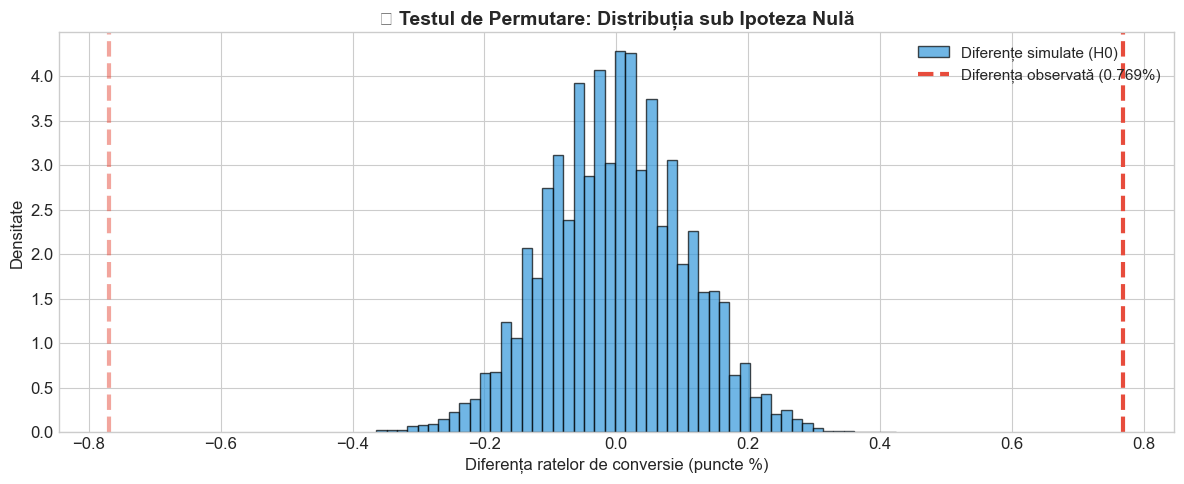

In [21]:
# Vizualizăm distribuția permutărilor
plt.figure(figsize=(12, 5))

plt.hist(diferente_sim * 100, bins=50, density=True, alpha=0.7, 
         color='#3498db', edgecolor='black', label='Diferențe simulate (H0)')
plt.axvline(x=diferenta_obs * 100, color='#e74c3c', linewidth=3, 
            linestyle='--', label=f'Diferența observată ({diferenta_obs*100:.3f}%)')
plt.axvline(x=-diferenta_obs * 100, color='#e74c3c', linewidth=3, 
            linestyle='--', alpha=0.5)

plt.xlabel('Diferența ratelor de conversie (puncte %)', fontsize=12)
plt.ylabel('Densitate', fontsize=12)
plt.title('🎲 Testul de Permutare: Distribuția sub Ipoteza Nulă', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [22]:
# Rezumat teste statistice
print("\n" + "=" * 60)
print("📋 REZUMATUL TESTELOR STATISTICE")
print("=" * 60)

rezultate_teste = pd.DataFrame({
    'Test': ['Chi-Pătrat', 'Test Z', 'Permutare'],
    'Valoarea p': [f"{p_value_chi:.6f}", f"{p_value_z:.6f}", f"{p_value_perm:.6f}"],
    'Semnificativ (p < 0.05)': [
        '✅ DA' if p_value_chi < 0.05 else '❌ NU',
        '✅ DA' if p_value_z < 0.05 else '❌ NU',
        '✅ DA' if p_value_perm < 0.05 else '❌ NU'
    ]
})
print(rezultate_teste.to_string(index=False))


📋 REZUMATUL TESTELOR STATISTICE
      Test Valoarea p Semnificativ (p < 0.05)
Chi-Pătrat   0.000000                    ✅ DA
    Test Z   0.000000                    ✅ DA
 Permutare   0.000000                    ✅ DA


---
## Partea 4: Algoritmul Multi-Arm Bandit (Epsilon-Greedy)
---

### 🎰 Ce este Multi-Arm Bandit?

O abordare alternativă la testarea A/B clasică care **adaptează în timp real** alocarea traficului către varianta mai performantă.

In [24]:
class EpsilonGreedyBandit:
    """
    Implementare a algoritmului Epsilon-Greedy.
    """
    
    def __init__(self, n_variante, epsilon=0.1):
        self.n_variante = n_variante
        self.epsilon = epsilon
        self.n_alegeri = np.zeros(n_variante)
        self.n_recompense = np.zeros(n_variante)
        self.istoric_alegeri = []
        self.istoric_recompense = []
        self.istoric_rate = []
        
    def rate_estimate(self):
        with np.errstate(divide='ignore', invalid='ignore'):
            rate = self.n_recompense / self.n_alegeri
            rate[np.isnan(rate)] = 0
        return rate
    
    def alege_varianta(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_variante)
        else:
            rate = self.rate_estimate()
            return np.random.choice(np.where(rate == rate.max())[0])
    
    def actualizeaza(self, varianta, recompensa):
        self.n_alegeri[varianta] += 1
        self.n_recompense[varianta] += recompensa
        self.istoric_alegeri.append(varianta)
        self.istoric_recompense.append(recompensa)
        self.istoric_rate.append(self.rate_estimate().copy())

print("✅ Clasa EpsilonGreedyBandit a fost definită!")

✅ Clasa EpsilonGreedyBandit a fost definită!


In [25]:
# Simulăm algoritmul Bandit folosind datele reale
print("🎰 Simulăm experimentul Multi-Arm Bandit pe datele reale...")
print(f"   Rate reale din date: {GROUP_A} = {rata_a*100:.3f}%, {GROUP_B} = {rata_b*100:.3f}%")
print(f"   Epsilon = 0.1 (10% explorare, 90% exploatare)\n")

# Folosim ratele reale din dataset
rate_reale = [rata_a, rata_b]
n_simulari = min(len(df), 10000)  # Limităm pentru viteză

np.random.seed(42)
bandit = EpsilonGreedyBandit(n_variante=2, epsilon=0.1)

for _ in range(n_simulari):
    varianta = bandit.alege_varianta()
    recompensa = 1 if np.random.random() < rate_reale[varianta] else 0
    bandit.actualizeaza(varianta, recompensa)

print(f"""
📊 REZULTATE după {n_simulari:,} simulări:
{'='*50}

   {GROUP_A} (varianta 0):
   - Alegeri: {int(bandit.n_alegeri[0]):,}
   - Conversii: {int(bandit.n_recompense[0]):,}
   - Rata estimată: {bandit.rate_estimate()[0]*100:.3f}%
   - Rata reală: {rate_reale[0]*100:.3f}%
   
   {GROUP_B} (varianta 1):
   - Alegeri: {int(bandit.n_alegeri[1]):,}
   - Conversii: {int(bandit.n_recompense[1]):,}
   - Rata estimată: {bandit.rate_estimate()[1]*100:.3f}%
   - Rata reală: {rate_reale[1]*100:.3f}%
""")

# Determinăm câștigătorul
winner_idx = np.argmax(rate_reale)
winner = GROUP_B if winner_idx == 1 else GROUP_A
traffic_to_winner = bandit.n_alegeri[winner_idx] / sum(bandit.n_alegeri) * 100

print(f"🎯 Observație: Algoritmul a trimis {traffic_to_winner:.1f}% din trafic")
print(f"   către varianta mai bună ({winner})!")

🎰 Simulăm experimentul Multi-Arm Bandit pe datele reale...
   Rate reale din date: psa = 1.785%, ad = 2.555%
   Epsilon = 0.1 (10% explorare, 90% exploatare)


📊 REZULTATE după 10,000 simulări:

   psa (varianta 0):
   - Alegeri: 3,193
   - Conversii: 69
   - Rata estimată: 2.161%
   - Rata reală: 1.785%

   ad (varianta 1):
   - Alegeri: 6,807
   - Conversii: 190
   - Rata estimată: 2.791%
   - Rata reală: 2.555%

🎯 Observație: Algoritmul a trimis 68.1% din trafic
   către varianta mai bună (ad)!


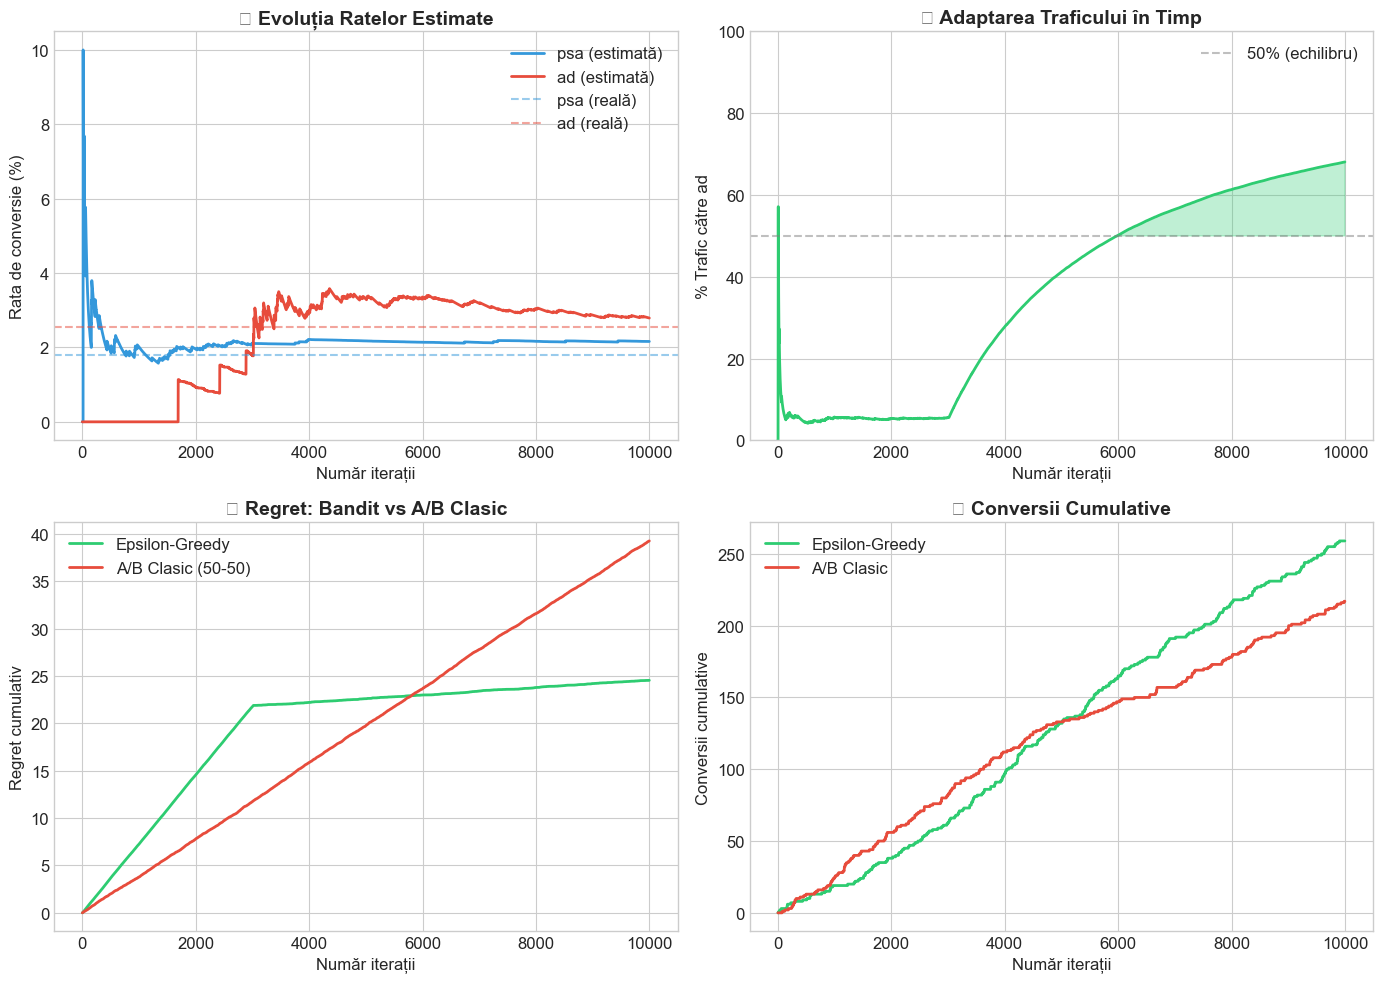


💡 Epsilon-Greedy a generat 42 conversii în plus!


In [26]:
# Vizualizăm comportamentul algoritmului
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grafic 1: Evoluția ratelor estimate
ax1 = axes[0, 0]
rate_istorice = np.array(bandit.istoric_rate)
ax1.plot(rate_istorice[:, 0] * 100, label=f'{GROUP_A} (estimată)', color='#3498db', linewidth=2)
ax1.plot(rate_istorice[:, 1] * 100, label=f'{GROUP_B} (estimată)', color='#e74c3c', linewidth=2)
ax1.axhline(y=rata_a*100, color='#3498db', linestyle='--', alpha=0.5, label=f'{GROUP_A} (reală)')
ax1.axhline(y=rata_b*100, color='#e74c3c', linestyle='--', alpha=0.5, label=f'{GROUP_B} (reală)')
ax1.set_xlabel('Număr iterații', fontsize=12)
ax1.set_ylabel('Rata de conversie (%)', fontsize=12)
ax1.set_title('📈 Evoluția Ratelor Estimate', fontsize=14, fontweight='bold')
ax1.legend()

# Grafic 2: Distribuția traficului
ax2 = axes[0, 1]
alegeri = np.array(bandit.istoric_alegeri)
proportie_winner = np.cumsum(alegeri == winner_idx) / np.arange(1, len(alegeri) + 1)
ax2.plot(proportie_winner * 100, color='#2ecc71', linewidth=2)
ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% (echilibru)')
ax2.fill_between(range(len(proportie_winner)), 50, proportie_winner * 100, 
                 where=proportie_winner > 0.5, alpha=0.3, color='#2ecc71')
ax2.set_xlabel('Număr iterații', fontsize=12)
ax2.set_ylabel(f'% Trafic către {winner}', fontsize=12)
ax2.set_title('🔄 Adaptarea Traficului în Timp', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.legend()

# Grafic 3: Regret cumulativ
ax3 = axes[1, 0]

def calculeaza_regret(alegeri, rate_reale):
    cea_mai_buna_rata = max(rate_reale)
    regret = np.cumsum([cea_mai_buna_rata - rate_reale[a] for a in alegeri])
    return regret

regret_bandit = calculeaza_regret(bandit.istoric_alegeri, rate_reale)
alegeri_ab = np.random.randint(0, 2, n_simulari)
regret_ab = calculeaza_regret(alegeri_ab, rate_reale)

ax3.plot(regret_bandit, label='Epsilon-Greedy', color='#2ecc71', linewidth=2)
ax3.plot(regret_ab, label='A/B Clasic (50-50)', color='#e74c3c', linewidth=2)
ax3.set_xlabel('Număr iterații', fontsize=12)
ax3.set_ylabel('Regret cumulativ', fontsize=12)
ax3.set_title('📉 Regret: Bandit vs A/B Clasic', fontsize=14, fontweight='bold')
ax3.legend()

# Grafic 4: Conversii cumulative
ax4 = axes[1, 1]
conversii_bandit = np.cumsum(bandit.istoric_recompense)
np.random.seed(123)
conversii_ab = np.cumsum([1 if np.random.random() < rate_reale[a] else 0 for a in alegeri_ab])

ax4.plot(conversii_bandit, label='Epsilon-Greedy', color='#2ecc71', linewidth=2)
ax4.plot(conversii_ab, label='A/B Clasic', color='#e74c3c', linewidth=2)
ax4.set_xlabel('Număr iterații', fontsize=12)
ax4.set_ylabel('Conversii cumulative', fontsize=12)
ax4.set_title('🏆 Conversii Cumulative', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()

print(f"\n💡 Epsilon-Greedy a generat {int(conversii_bandit[-1] - conversii_ab[-1])} conversii în plus!")

---
## Partea 5: Concluzii și Raport Final
---

In [27]:
# Interval de încredere
def interval_incredere_diferenta(p1, n1, p2, n2, confidence=0.95):
    z = stats.norm.ppf((1 + confidence) / 2)
    se1 = np.sqrt(p1 * (1 - p1) / n1)
    se2 = np.sqrt(p2 * (1 - p2) / n2)
    se_diff = np.sqrt(se1**2 + se2**2)
    diff = p2 - p1
    return diff - z * se_diff, diff + z * se_diff

ci_lower, ci_upper = interval_incredere_diferenta(rata_a, n_a, rata_b, n_b)

print(f"""
{'='*70}
📊 RAPORT FINAL AL EXPERIMENTULUI A/B
{'='*70}

📁 SURSA DATELOR: {DATA_SOURCE.upper()}
   • Total înregistrări: {len(df):,}

1️⃣ REZULTATE BRUTE:
   • {GROUP_A} (Control): {rata_a*100:.4f}% conversie ({conversii_a:,}/{n_a:,})
   • {GROUP_B} (Test): {rata_b*100:.4f}% conversie ({conversii_b:,}/{n_b:,})

2️⃣ LIFT (Îmbunătățire):
   • Lift absolut: {lift_absolut:+.4f} puncte procentuale
   • Lift relativ: {lift_relativ:+.2f}%
   • Interval de încredere 95%: [{ci_lower*100:.4f}%, {ci_upper*100:.4f}%]

3️⃣ SEMNIFICAȚIE STATISTICĂ:
   • Test Chi-Pătrat: p = {p_value_chi:.6f}
   • Test Z: p = {p_value_z:.6f}
   • Test Permutare: p = {p_value_perm:.6f}
   • Concluzie: {"✅ SEMNIFICATIV" if p_value_chi < 0.05 else "⚠️ NU E SEMNIFICATIV"}

4️⃣ RECOMANDARE:
""")

if p_value_chi < 0.05:
    winner = GROUP_B if rata_b > rata_a else GROUP_A
    print(f"""   ✅ IMPLEMENTEAZĂ VARIANTA {winner.upper()}!
   
   Datele arată clar că {winner} performează mai bine.
   Cu un lift de {abs(lift_relativ):.2f}%, poți aștepta rezultate 
   îmbunătățite pe termen lung.""")
else:
    print("""   ⚠️ CONTINUĂ EXPERIMENTUL
   
   Diferența observată nu este semnificativă statistic.
   Recomandări:
   1. Colectează mai multe date
   2. Verifică dacă există segmente care răspund diferit
   3. Consideră factori externi care pot influența rezultatele""")

print(f"""
{'='*70}
""")


📊 RAPORT FINAL AL EXPERIMENTULUI A/B

📁 SURSA DATELOR: KAGGLE_REAL
   • Total înregistrări: 588,101

1️⃣ REZULTATE BRUTE:
   • psa (Control): 1.7854% conversie (420/23,524)
   • ad (Test): 2.5547% conversie (14,423/564,577)

2️⃣ LIFT (Îmbunătățire):
   • Lift absolut: +0.7692 puncte procentuale
   • Lift relativ: +43.09%
   • Interval de încredere 95%: [0.5951%, 0.9434%]

3️⃣ SEMNIFICAȚIE STATISTICĂ:
   • Test Chi-Pătrat: p = 0.000000
   • Test Z: p = 0.000000
   • Test Permutare: p = 0.000000
   • Concluzie: ✅ SEMNIFICATIV

4️⃣ RECOMANDARE:

   ✅ IMPLEMENTEAZĂ VARIANTA AD!

   Datele arată clar că ad performează mai bine.
   Cu un lift de 43.09%, poți aștepta rezultate 
   îmbunătățite pe termen lung.




In [ ]:
# Salvăm rezultatele
df.to_csv('date_experiment_real.csv', index=False)
print("✅ Datele au fost salvate în 'date_experiment_real.csv'")

raport = f"""
RAPORT EXPERIMENT A/B - OPTIMIZARE CAMPANIE MARKETING
=====================================================
Sursa datelor: {DATA_SOURCE}

CONFIGURAȚIE:
- Total utilizatori: {len(df):,}
- Grup Control ({GROUP_A}): {n_a:,}
- Grup Test ({GROUP_B}): {n_b:,}

REZULTATE:
- Rata conversie {GROUP_A}: {rata_a*100:.4f}%
- Rata conversie {GROUP_B}: {rata_b*100:.4f}%
- Lift relativ: {lift_relativ:+.2f}%

TESTE STATISTICE:
- Chi-Pătrat p-value: {p_value_chi:.6f}
- Test Z p-value: {p_value_z:.6f}
- Permutare p-value: {p_value_perm:.6f}
- Interval de încredere 95%: [{ci_lower*100:.4f}%, {ci_upper*100:.4f}%]

CONCLUZIE: {"Diferența este SEMNIFICATIVĂ STATISTIC" if p_value_chi < 0.05 else "Diferența NU este semnificativă statistic"}
"""

with open('raport_ab_test.txt', 'w', encoding='utf-8') as f:
    f.write(raport)
print("✅ Raportul a fost salvat în 'raport_ab_test.txt'")

---
## 🎉 Felicitări! Ai Finalizat Proiectul!
---

### 📚 Ce ai învățat:

- ✅ Cum să descarci și procesezi date reale de pe Kaggle
- ✅ Cum să faci analiză exploratorie pe date de marketing
- ✅ 3 metode de testare statistică (Chi², Z, Permutare)
- ✅ Algoritmul Epsilon-Greedy Multi-Arm Bandit
- ✅ Cum să interpretezi și raportezi rezultatele

### 🚀 Pași Următori:

1. **Explorează alte dataset-uri** pe Kaggle
2. **Încearcă alți algoritmi** (UCB, Thompson Sampling)
3. **Implementează segmentare** pentru a găsi grupuri care răspund diferit
4. **Aplică aceste tehnici** în proiecte reale